<a href="https://colab.research.google.com/github/AlvarezTolosa/Repositorio-IA3/blob/main/Ejercicio_Jumanji_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

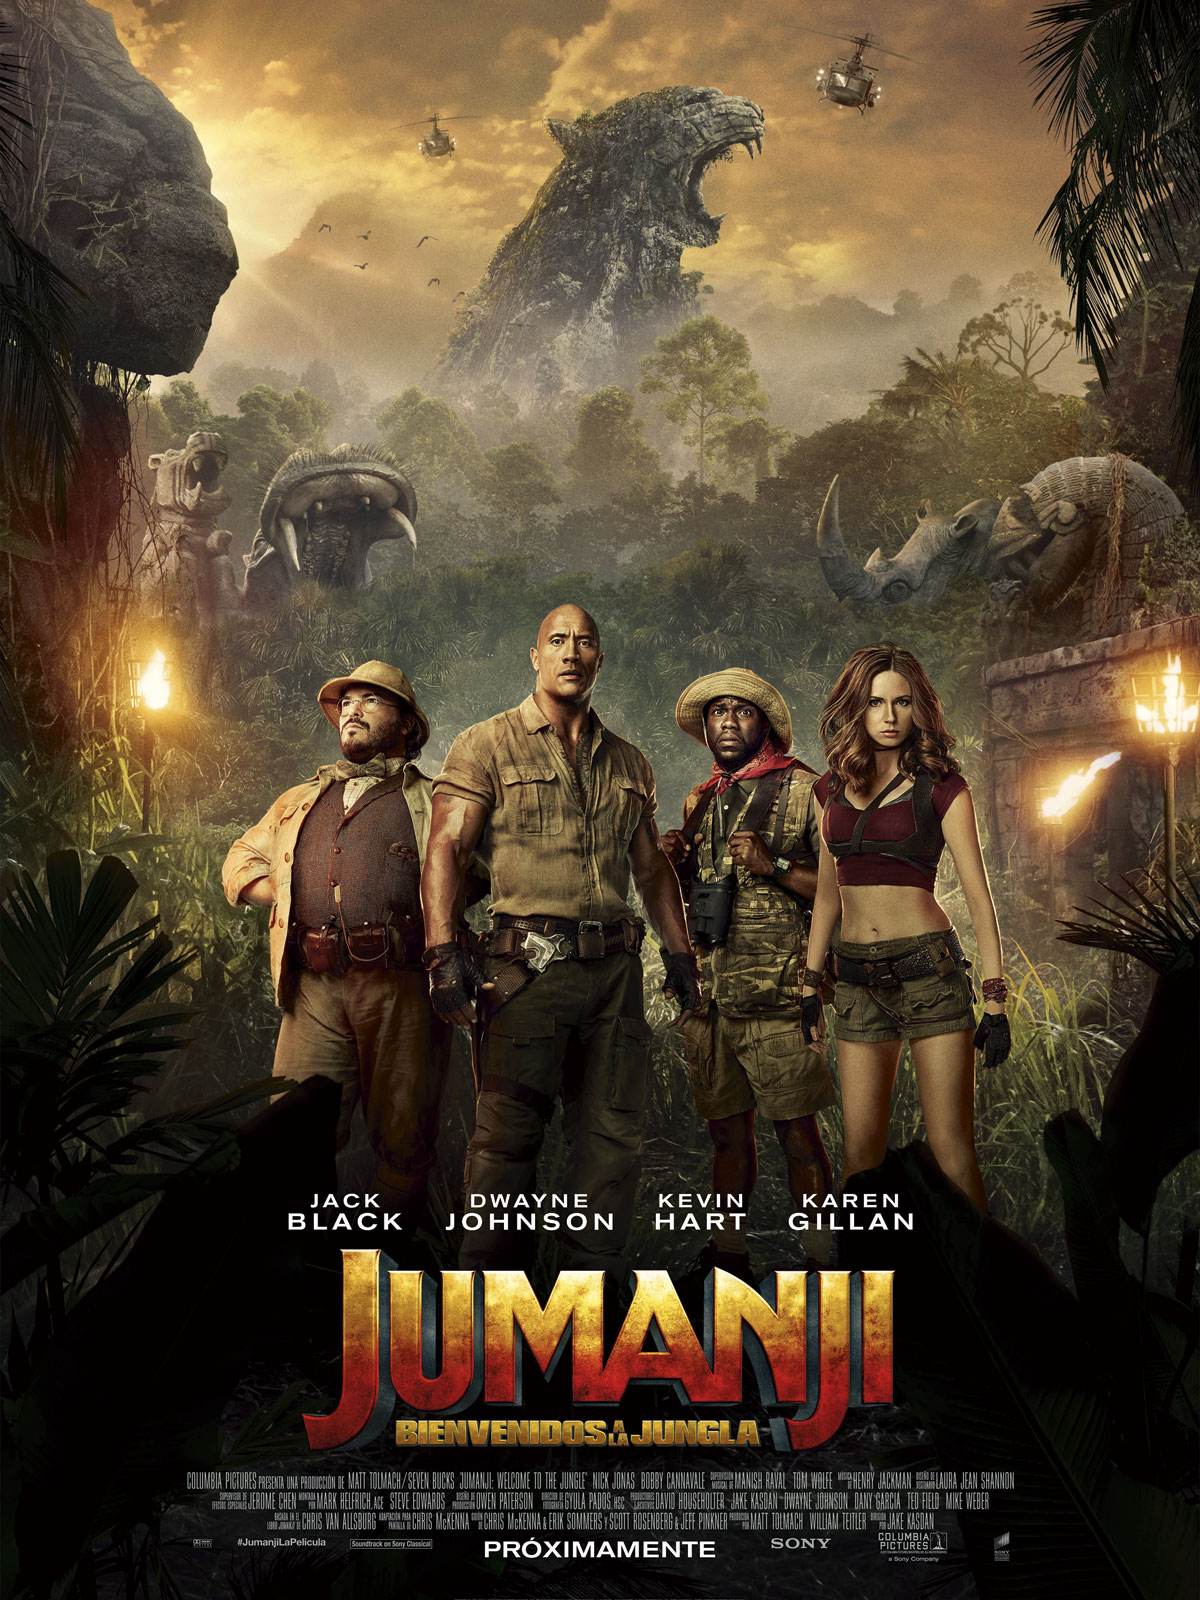

# Ejercicio Jumanji - Bienvenidos a la jungla

Wellcome to Jumanji dear adventurers. Unfortunately not everything are good news, some players have been playing to the game and, as a result of they dumb plays, a stampede of cats and dogs is now running in the real world.

As a fellow explorer I am sure that you understand the urgency of the situation. To solve it, we need to create a computer vision algorithm using CNNs to detect the cats and the dogs.

In order to do so we require the following steps:

- Create an image preprocessing pipeline to treat the images that we are providing. Perform data augmentation over the dataset, at least rotations.

- Test several architechtures (at least 3) and evaluate their performance over the dataset.

- Visualize the feature maps of some of the early and late layers of the models developed. ¿Is there any feature which could be explained through them?

- Finally select the model which performs the best over the whole dataset and explain why.

Fellow adventurer, thanks for your time, Jumanji will not forget your efforts.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Me aparto 100 imágenes, 50 de cada, para probar después el modelo

In [ ]:
from PIL import Image

In [ ]:
cat_files = os.listdir("/content/cats_and_dogs_filtered/train/cats")
dog_files = os.listdir("/content/cats_and_dogs_filtered/train/dogs")

In [ ]:
def change_resolution(img, desired_resolution):
  width, height = img.size
  if width > height:
    aspect_relatio = width/height
    new_width = desired_resolution
    new_height = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  else:
    aspect_relatio = height/width
    new_height = desired_resolution
    new_width = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  return resized_img

def pad_img(img, desired_resolution):
  width, height = img.size
  array = np.array(img)
  if width > height:
    total_pad = desired_resolution - height
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((pad_0, pad_1),(0,0),(0,0)))
    else:
      padded_image = np.pad(array, ((pad, pad),(0,0),(0,0)))
  else:
    total_pad = desired_resolution - width
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((0,0),(pad_0, pad_1),(0,0)))
    else:
      padded_image = np.pad(array, ((0,0),(pad, pad),(0,0)))
  return padded_image

In [ ]:
preprocess_path_train = "my_cats&dogs/train/cats" 
os.makedirs(preprocess_path_train, exist_ok=True)
preprocess_path_val = "my_cats&dogs/test/cats" 
os.makedirs(preprocess_path_val, exist_ok=True)
i=0
for file_ in cat_files:

  path = os.path.join("cats_and_dogs_filtered/train/cats", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 150)
  padded_img = pad_img(resized_img, 150)
  preprocessed_image = Image.fromarray(padded_img)
  if i<len(cat_files)-50:
    save_path = os.path.join(preprocess_path_train, file_)
    preprocessed_image.save(save_path)  
  elif i>=len(cat_files)-50:
    save_path = os.path.join(preprocess_path_val, file_)
    preprocessed_image.save(save_path)
  i=i+1

In [ ]:
preprocess_path_train = "my_cats&dogs/train/dogs" 
os.makedirs(preprocess_path_train, exist_ok=True)
preprocess_path_val = "my_cats&dogs/test/dogs" 
os.makedirs(preprocess_path_val, exist_ok=True) 
i=0
for file_ in dog_files:

  path = os.path.join("cats_and_dogs_filtered/train/dogs", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 150)
  padded_img = pad_img(resized_img, 150)
  preprocessed_image = Image.fromarray(padded_img)
  if i<len(dog_files)-50:
    save_path = os.path.join(preprocess_path_train, file_)
    preprocessed_image.save(save_path)  
  elif i>=len(dog_files)-50:
    save_path = os.path.join(preprocess_path_val, file_)
    preprocessed_image.save(save_path)
  i=i+1

In [ ]:
cat_files_val = os.listdir("/content/cats_and_dogs_filtered/validation/cats")
dog_files_val = os.listdir("/content/cats_and_dogs_filtered/validation/dogs")

In [ ]:
preprocess_path = "my_cats&dogs/validation/cats" 
os.makedirs(preprocess_path, exist_ok=True)
for file_ in cat_files_val:
  path = os.path.join("cats_and_dogs_filtered/validation/cats", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 150)
  padded_img = pad_img(resized_img, 150)
  preprocessed_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_)
  preprocessed_image.save(save_path)

In [ ]:
preprocess_path = "my_cats&dogs/validation/dogs" 
os.makedirs(preprocess_path, exist_ok=True)
for file_ in dog_files_val:
  path = os.path.join("cats_and_dogs_filtered/validation/dogs", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 150)
  padded_img = pad_img(resized_img, 150)
  
  preprocessed_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_)
  preprocessed_image.save(save_path)

## **Preprocesado de datos:**

In [ ]:
batch_size = 32
img_height = 150
img_width = 150
data_dir='/content/my_cats&dogs/train'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1900 files belonging to 2 classes.
Using 1520 files for training.


In [ ]:
class_names=train_ds.class_names

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/my_cats&dogs/validation',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


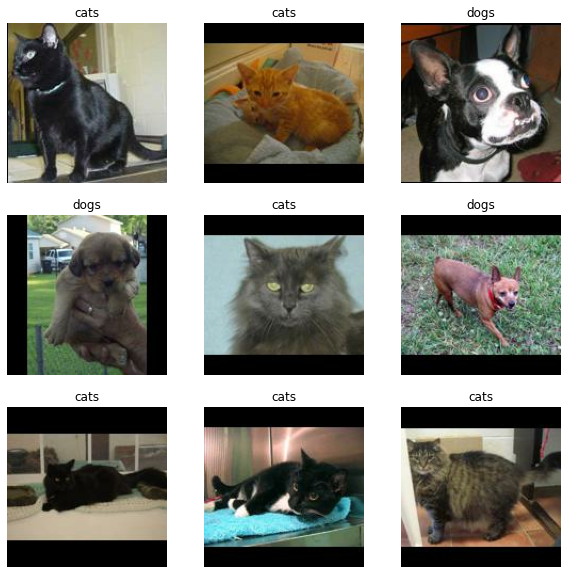

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


## **Primer modelo sin 'Data Augmentation:'**

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [ ]:
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs )

Epoch 1/10
48/48 [==============================] - 12s 30ms/step - loss: 0.7388 - accuracy: 0.5026 - val_loss: 0.7019 - val_accuracy: 0.4450
Epoch 2/10
48/48 [==============================] - 1s 22ms/step - loss: 0.6625 - accuracy: 0.6053 - val_loss: 0.6535 - val_accuracy: 0.6100
Epoch 3/10
48/48 [==============================] - 1s 23ms/step - loss: 0.6062 - accuracy: 0.6658 - val_loss: 0.6040 - val_accuracy: 0.6850
Epoch 4/10
48/48 [==============================] - 1s 23ms/step - loss: 0.5675 - accuracy: 0.7007 - val_loss: 0.6056 - val_accuracy: 0.6500
Epoch 5/10
48/48 [==============================] - 1s 23ms/step - loss: 0.5388 - accuracy: 0.7263 - val_loss: 0.5818 - val_accuracy: 0.7050
Epoch 6/10
48/48 [==============================] - 1s 24ms/step - loss: 0.4605 - accuracy: 0.7724 - val_loss: 0.5900 - val_accuracy: 0.7350
Epoch 7/10
48/48 [==============================] - 1s 24ms/step - loss: 0.4053 - accuracy: 0.8112 - val_loss: 0.6647 - val_accuracy: 0.6800
Epoch 8/10
4

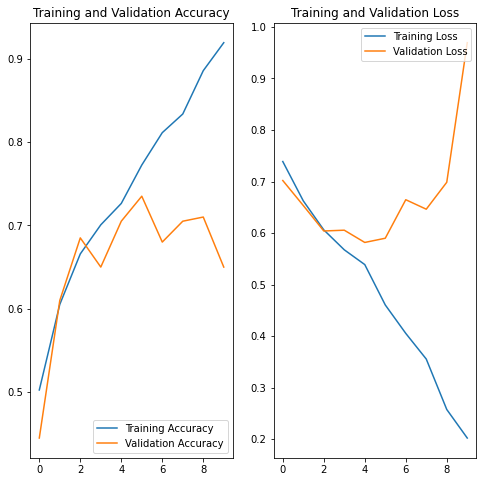

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Se produce overfitting

## **Segundo modelo con 'Data Augmentation:'**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.4),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
48/48 [==============================] - 2s 28ms/step - loss: 0.7409 - accuracy: 0.5105 - val_loss: 0.6947 - val_accuracy: 0.4400
Epoch 2/15
48/48 [==============================] - 1s 24ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.4550
Epoch 3/15
48/48 [==============================] - 1s 25ms/step - loss: 0.6929 - accuracy: 0.5145 - val_loss: 0.6952 - val_accuracy: 0.4200
Epoch 4/15
48/48 [==============================] - 1s 25ms/step - loss: 0.6924 - accuracy: 0.5257 - val_loss: 0.6982 - val_accuracy: 0.4450
Epoch 5/15
48/48 [==============================] - 1s 24ms/step - loss: 0.6864 - accuracy: 0.5579 - val_loss: 0.7152 - val_accuracy: 0.4500
Epoch 6/15
48/48 [==============================] - 1s 23ms/step - loss: 0.6898 - accuracy: 0.5342 - val_loss: 0.7442 - val_accuracy: 0.4600
Epoch 7/15
48/48 [==============================] - 1s 26ms/step - loss: 0.6831 - accuracy: 0.5559 - val_loss: 0.6967 - val_accuracy: 0.5150
Epoch 8/15
48

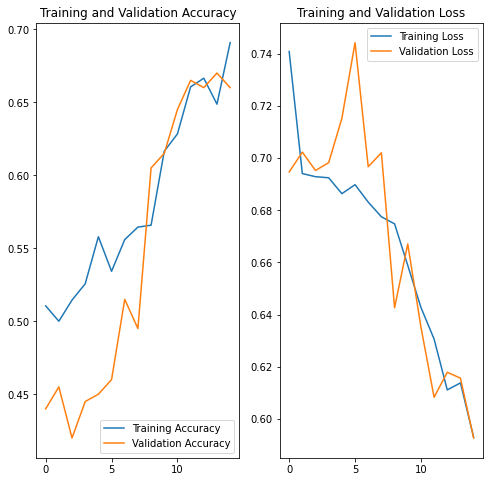

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
scores_tr = model.evaluate(train_ds)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(val_ds)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()


48/48 [==============================] - 1s 16ms/step - loss: 0.5782 - accuracy: 0.7033
Train loss    : 0.5782177448272705
Train accuracy: 0.7032894492149353

7/7 [==============================] - 0s 9ms/step - loss: 0.5927 - accuracy: 0.6600
Val loss    : 0.5927193760871887
Val accuracy: 0.6600000262260437



## **Compruebo el resultado con las imágenes apartadas al principio:'**

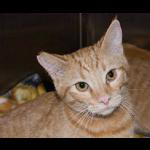

In [ ]:
imagen = load_img('/content/my_cats&dogs/test/cats/cat.14.jpg')
display(imagen)
print()

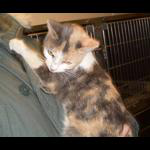

This image most likely belongs to cats with a 51.91 percent confidence.


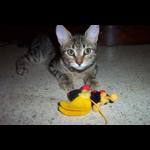

This image most likely belongs to dogs with a 58.64 percent confidence.


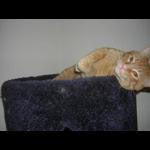

This image most likely belongs to cats with a 54.56 percent confidence.


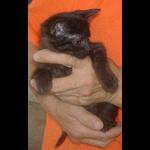

This image most likely belongs to cats with a 54.81 percent confidence.


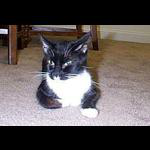

This image most likely belongs to dogs with a 87.26 percent confidence.


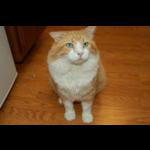

This image most likely belongs to cats with a 59.31 percent confidence.


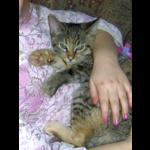

This image most likely belongs to cats with a 61.08 percent confidence.


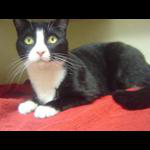

This image most likely belongs to cats with a 63.35 percent confidence.


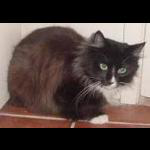

This image most likely belongs to cats with a 65.49 percent confidence.


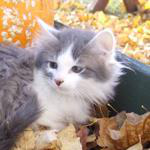

This image most likely belongs to cats with a 58.60 percent confidence.


In [ ]:
from glob import glob
ficheros = glob("/content/my_cats&dogs/test/cats/*")

for fich in ficheros[0:10]:

      img = load_img(fich)

      img_array = tf.keras.utils.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])
      display(img)
      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
      )

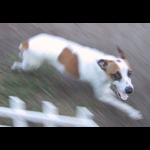

This image most likely belongs to cats with a 58.97 percent confidence.


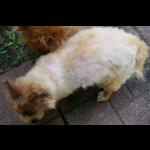

This image most likely belongs to cats with a 69.91 percent confidence.


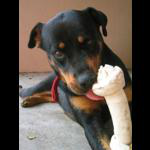

This image most likely belongs to dogs with a 62.15 percent confidence.


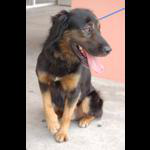

This image most likely belongs to dogs with a 66.54 percent confidence.


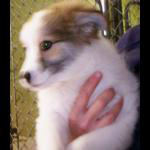

This image most likely belongs to cats with a 55.08 percent confidence.


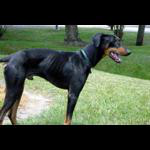

This image most likely belongs to dogs with a 97.15 percent confidence.


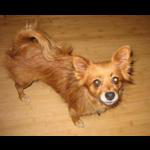

This image most likely belongs to dogs with a 73.80 percent confidence.


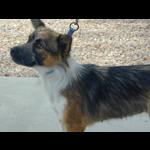

This image most likely belongs to cats with a 51.07 percent confidence.


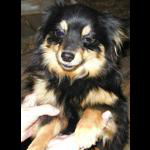

This image most likely belongs to dogs with a 57.87 percent confidence.


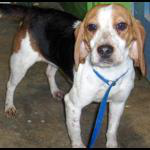

This image most likely belongs to dogs with a 57.75 percent confidence.


In [ ]:
from glob import glob
ficheros = glob("/content/my_cats&dogs/test/dogs/*")

for fich in ficheros[0:10]:

      img = load_img(fich)

      img_array = tf.keras.utils.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])
      display(img)
      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
      )

In [ ]:
## fin de la prueba